In [2]:
from market import *
from market_ml import *
import numpy as np

In [3]:
tickers = get_tickers()
print(tickers)

['PIH' 'TURN' 'FLWS' ... 'XNET' 'YNDX' 'YTRA']


In [4]:
def decide_transaction(tickers,  time_averaged=False, thresh=15):
    predictions = []
    actual = []
    decisions = [0] * len(tickers)
    i = 0
    model = train_and_get_model()
    for ticker in tickers:
        if time_averaged:
            pred = predict_price_time_averaged(ticker, time_averaged_period, verbose=0)
        else:
            pred = predict_price(ticker, model=model)
        summary = parse(ticker)
        if summary != {"error":"Failed to parse json response"}:
            try:
                real = float(summary['Open'])
            except KeyError:
                i += 1
                continue
            predictions.append(pred)
            actual.append(real)
            if pred != -1:
                if pred - real > 0:
                    valuation = 'undervalued'
                    percent_undervalued = abs(pred - real) / real * 100
                    if percent_undervalued > thresh:
                        decisions[i] = round(percent_undervalued)
                elif pred - real < 0:
                    valuation = 'overvalued'
                    percent_overvalued = abs(pred - real) / real * 100
                    if percent_overvalued > thresh:
                        decisions[i] = -1 * round(percent_overvalued)
                percent = str(round(abs(pred - real) / real * 100, 2)) + '%'
                print(ticker + ' is ' + valuation + ' by ' + str(round(abs(pred - real), 2)) + ', or ' + percent + '.')
        i += 1
    return decisions, actual, tickers

In [7]:
import random

selection = random.sample(list(get_tickers()), k = 112)
decisions, actual, tickers = decide_transaction(selection)


PRGS is overvalued by 2.02, or 5.03%.
NIHD is undervalued by 1.14, or 59.28%.
CGNX is undervalued by 3.12, or 6.18%.
SGC is overvalued by 0.06, or 0.35%.
LPSN is undervalued by 5.57, or 14.45%.
AMCX is overvalued by 13.0, or 26.45%.
FTEK is overvalued by 1.17, or 113.95%.
MITK is undervalued by 1.77, or 17.99%.
UMRX is overvalued by 0.2, or 10.35%.
CSX is overvalued by 37.33, or 52.79%.
CORE is overvalued by 7.98, or 25.74%.
BLCM is undervalued by 0.22, or 20.42%.
SPCB is undervalued by 0.04, or 4.13%.
SGMS is undervalued by 0.96, or 4.17%.
CDTX is undervalued by 0.14, or 6.97%.
CBAN is overvalued by 0.46, or 2.93%.
PVAC is undervalued by 4.85, or 15.1%.
AMSWA is overvalued by 0.37, or 2.46%.
EKSO is undervalued by 1.38, or 255.72%.
GT is overvalued by 0.48, or 3.57%.
JAGX is undervalued by 0.27, or 19.87%.
RICK is undervalued by 1.51, or 8.88%.
CARV is undervalued by 4.78, or 142.55%.
ENT is overvalued by 0.38, or 45.0%.
ENFC is overvalued by 1.33, or 4.42%.
LQDT is undervalued by 0.2

In [9]:
decisions

[0,
 0,
 0,
 0,
 0,
 0,
 17.0,
 0,
 0,
 -36.0,
 38.0,
 0,
 -21.0,
 0,
 -78.0,
 0,
 0,
 33.0,
 -34.0,
 0,
 40.0,
 20.0,
 0,
 32.0,
 0,
 -17.0,
 0,
 -16.0,
 70.0,
 -585.0,
 0,
 0,
 88.0,
 -17.0,
 16.0,
 0,
 -30.0,
 -47.0,
 0,
 33.0,
 23.0,
 -85.0,
 -36.0,
 0,
 0,
 56.0,
 0,
 0,
 21.0,
 0,
 -69.0,
 0,
 0,
 0,
 32.0,
 0,
 0,
 0,
 38.0,
 31.0,
 85.0,
 0,
 49.0,
 0,
 0,
 22.0,
 0,
 0,
 0,
 0,
 0,
 97.0,
 0,
 0,
 0,
 0,
 -25.0,
 144.0,
 38.0,
 -24.0,
 0,
 38.0,
 0,
 46.0,
 0,
 0,
 0,
 18.0,
 0,
 0,
 0,
 0,
 21.0,
 22.0,
 0,
 0,
 460.0,
 0,
 233.0,
 0,
 0,
 19.0,
 0,
 0,
 0,
 39.0,
 0,
 -21.0,
 0,
 -80.0,
 -42.0,
 30.0]

In [4]:
def make_transactions(decisions, actual, tickers, portfolio):
    transactions = [] # Each entry will be ticker, price, amount, sell/buy
    for i, ticker in enumerate(tickers):
        if decision[i] == 0:
            for position in portfolio:
                if ticker == position[0]:
                    transactions.append([ticker, actual[i], -position[1], 'no position'])
        else:
            if decision[i] > 0:
                transactions.append([ticker, actual[i], decision[i], 'buy'])
            if decision[i] < 0:
                transactions.append([ticker, actual[i], -1*decision[i], 'sell'])
    return transactions

In [18]:
from datetime import date
import datetime
import matplotlib.pyplot as plt
from pandas_datareader._utils import RemoteDataError

# Analytics for predictions 
def prediction_analytics(tickers, end_date=None, numdays=5):
    '''
    
    '''
    if end_date == None: # Use yesterday
        base = str((datetime.datetime.today() - datetime.timedelta(1)).date())
    else:
        base = end_date
    date_list_raw = pd.date_range(end=base, periods = numdays, freq='B')
    csvs = []
    date_list = list(map(lambda x: str(x.date()), date_list_raw))
    print(date_list)
    for i in range(len(date_list)):
        csvs.append('company_stats_' + str(date_list[i]) + '.csv')
    
    # Get the models to predict the prices for each date
    models = {} # Store models as date:model
    for i, csv in enumerate(csvs):
            try:
                models[date_list[i]] = train_and_get_model(filename=csv, verbose=0)
            except FileNotFoundError:
                print(csv + ' was not found. Data from that day will be excluded.')
            except ValueError:
                print(csv + ' was not found. Data from that day will be excluded.')
                
    # Calculate actual and predicted prices for each ticker over time period
    actual_prices = {}
    predicted_prices = {}
    for ticker in tickers:
        try:
            print('Analytics for ' + ticker)
            #print("getting price data for: " + str(date_list[0].date()) + ' to ' + str(date_list[len(date_list)-1].date()))
            price_data = get_price_data(ticker, date_list[0], date_list[len(date_list) - 1])['Open']
            pred_prices = []
            # Loop through dates instead!
            for date in date_list:
                print('Predicting Price for ' + ticker + ' for model on ' + str(date))
                if date in models:
                    p = predict_price(ticker, model=models[date])
                else:
                    p = float('nan')
                pred_prices.append(p)
            actual_prices[ticker] = price_data
            predicted_prices[ticker] = pred_prices
            # Plot the actual prices over time
            a, = plt.plot(date_list, list(price_data))
            p, = plt.plot(date_list, pred_prices)
            plt.legend([a, p], ['Actual', 'Predicted'])
            plt.title('Actual vs Predicted Price Over Time For ' + ticker)
            # Plot the predicted prices over time
            plt.show()
        except IndexError:
            print('IndexError for ' + ticker)
        except RemoteDataError:
            print("RemoteDataError for " + ticker)

['2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25']
company_stats_2019-09-13.csv was not found. Data from that day will be excluded.
company_stats_2019-09-23.csv was not found. Data from that day will be excluded.
Analytics for PIH
Predicting Price for PIH for model on 2019-09-13
Predicting Price for PIH for model on 2019-09-16
Predicting Price for PIH for model on 2019-09-17
Predicting Price for PIH for model on 2019-09-18
Predicting Price for PIH for model on 2019-09-19
Predicting Price for PIH for model on 2019-09-20
Predicting Price for PIH for model on 2019-09-23
Predicting Price for PIH for model on 2019-09-24
Predicting Price for PIH for model on 2019-09-25


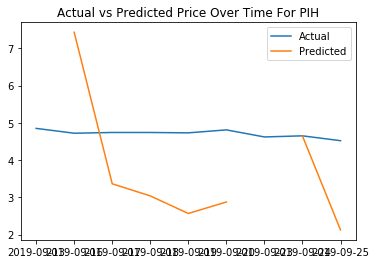

Analytics for TURN
RemoteDataError for TURN
Analytics for FLWS
Predicting Price for FLWS for model on 2019-09-13
Predicting Price for FLWS for model on 2019-09-16
Predicting Price for FLWS for model on 2019-09-17
Predicting Price for FLWS for model on 2019-09-18
Predicting Price for FLWS for model on 2019-09-19
Predicting Price for FLWS for model on 2019-09-20
Predicting Price for FLWS for model on 2019-09-23
Predicting Price for FLWS for model on 2019-09-24
Predicting Price for FLWS for model on 2019-09-25


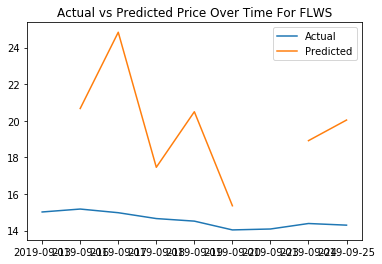

Analytics for FCCY
Predicting Price for FCCY for model on 2019-09-13
Predicting Price for FCCY for model on 2019-09-16
Predicting Price for FCCY for model on 2019-09-17
Predicting Price for FCCY for model on 2019-09-18
Predicting Price for FCCY for model on 2019-09-19
Predicting Price for FCCY for model on 2019-09-20
Predicting Price for FCCY for model on 2019-09-23
Predicting Price for FCCY for model on 2019-09-24
Predicting Price for FCCY for model on 2019-09-25


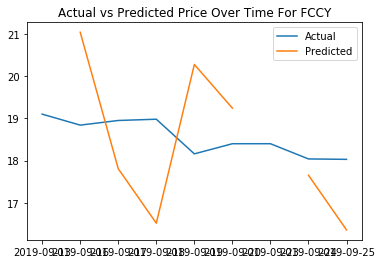

Analytics for SRCE
Predicting Price for SRCE for model on 2019-09-13
Predicting Price for SRCE for model on 2019-09-16
Predicting Price for SRCE for model on 2019-09-17
Predicting Price for SRCE for model on 2019-09-18
Predicting Price for SRCE for model on 2019-09-19
Predicting Price for SRCE for model on 2019-09-20
Predicting Price for SRCE for model on 2019-09-23
Predicting Price for SRCE for model on 2019-09-24
Predicting Price for SRCE for model on 2019-09-25


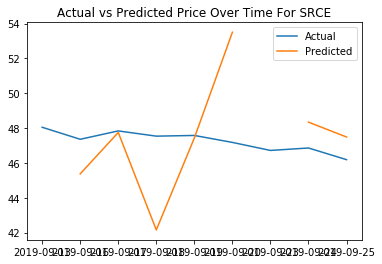

Analytics for VNET
RemoteDataError for VNET
Analytics for TWOU
RemoteDataError for TWOU
Analytics for TPNL
IndexError for TPNL
Analytics for JOBS
Predicting Price for JOBS for model on 2019-09-13
Predicting Price for JOBS for model on 2019-09-16
Predicting Price for JOBS for model on 2019-09-17
Predicting Price for JOBS for model on 2019-09-18
Predicting Price for JOBS for model on 2019-09-19
Predicting Price for JOBS for model on 2019-09-20
Predicting Price for JOBS for model on 2019-09-23
Predicting Price for JOBS for model on 2019-09-24
Predicting Price for JOBS for model on 2019-09-25


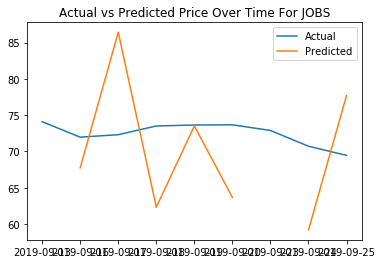

Analytics for EGHT
Predicting Price for EGHT for model on 2019-09-13
Predicting Price for EGHT for model on 2019-09-16
Predicting Price for EGHT for model on 2019-09-17
Predicting Price for EGHT for model on 2019-09-18
Predicting Price for EGHT for model on 2019-09-19
Predicting Price for EGHT for model on 2019-09-20
Predicting Price for EGHT for model on 2019-09-23
Predicting Price for EGHT for model on 2019-09-24
Predicting Price for EGHT for model on 2019-09-25


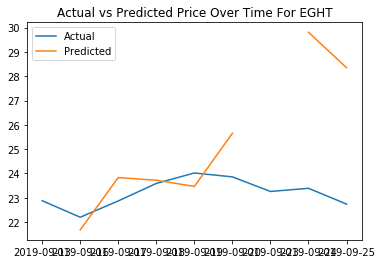

Analytics for AAON
Predicting Price for AAON for model on 2019-09-13
Predicting Price for AAON for model on 2019-09-16
Predicting Price for AAON for model on 2019-09-17
Predicting Price for AAON for model on 2019-09-18
Predicting Price for AAON for model on 2019-09-19
Predicting Price for AAON for model on 2019-09-20
Predicting Price for AAON for model on 2019-09-23
Predicting Price for AAON for model on 2019-09-24
Predicting Price for AAON for model on 2019-09-25


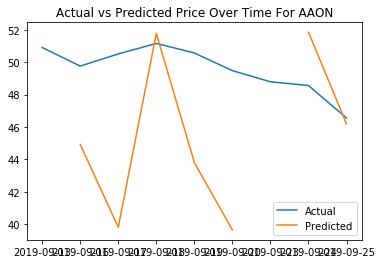

Analytics for ABEO
Predicting Price for ABEO for model on 2019-09-13
Predicting Price for ABEO for model on 2019-09-16
Predicting Price for ABEO for model on 2019-09-17
Predicting Price for ABEO for model on 2019-09-18
Predicting Price for ABEO for model on 2019-09-19
Predicting Price for ABEO for model on 2019-09-20
Predicting Price for ABEO for model on 2019-09-23
Predicting Price for ABEO for model on 2019-09-24
Predicting Price for ABEO for model on 2019-09-25


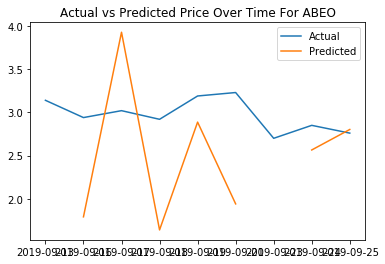

Analytics for ABIL
Predicting Price for ABIL for model on 2019-09-13
Predicting Price for ABIL for model on 2019-09-16
Predicting Price for ABIL for model on 2019-09-17
Predicting Price for ABIL for model on 2019-09-18
Predicting Price for ABIL for model on 2019-09-19
Predicting Price for ABIL for model on 2019-09-20
Predicting Price for ABIL for model on 2019-09-23
Predicting Price for ABIL for model on 2019-09-24
Predicting Price for ABIL for model on 2019-09-25


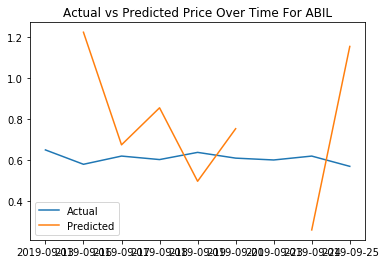

Analytics for ABMD
Predicting Price for ABMD for model on 2019-09-13
Predicting Price for ABMD for model on 2019-09-16
Predicting Price for ABMD for model on 2019-09-17
Predicting Price for ABMD for model on 2019-09-18
Predicting Price for ABMD for model on 2019-09-19
Predicting Price for ABMD for model on 2019-09-20
Predicting Price for ABMD for model on 2019-09-23
Predicting Price for ABMD for model on 2019-09-24
Predicting Price for ABMD for model on 2019-09-25


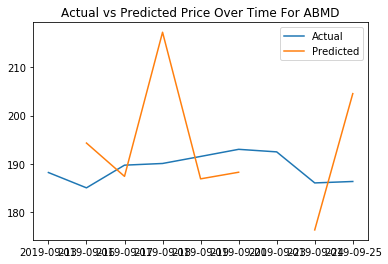

Analytics for AXAS
Predicting Price for AXAS for model on 2019-09-13
Predicting Price for AXAS for model on 2019-09-16
Predicting Price for AXAS for model on 2019-09-17
Predicting Price for AXAS for model on 2019-09-18
Predicting Price for AXAS for model on 2019-09-19
Predicting Price for AXAS for model on 2019-09-20
Predicting Price for AXAS for model on 2019-09-23
Predicting Price for AXAS for model on 2019-09-24
Predicting Price for AXAS for model on 2019-09-25


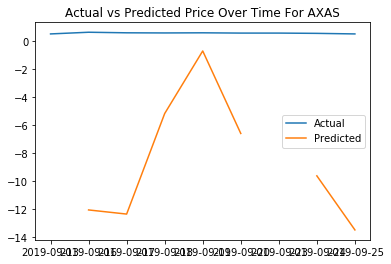

Analytics for ACIU
Predicting Price for ACIU for model on 2019-09-13
Predicting Price for ACIU for model on 2019-09-16
Predicting Price for ACIU for model on 2019-09-17
Predicting Price for ACIU for model on 2019-09-18
Predicting Price for ACIU for model on 2019-09-19
Predicting Price for ACIU for model on 2019-09-20
Predicting Price for ACIU for model on 2019-09-23
Predicting Price for ACIU for model on 2019-09-24
Predicting Price for ACIU for model on 2019-09-25


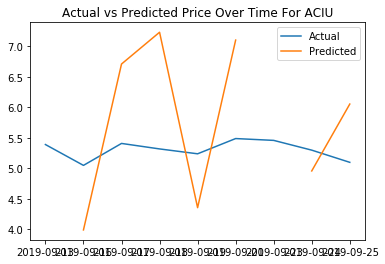

Analytics for ACIA
Predicting Price for ACIA for model on 2019-09-13
Predicting Price for ACIA for model on 2019-09-16
Predicting Price for ACIA for model on 2019-09-17
Predicting Price for ACIA for model on 2019-09-18
Predicting Price for ACIA for model on 2019-09-19
Predicting Price for ACIA for model on 2019-09-20
Predicting Price for ACIA for model on 2019-09-23
Predicting Price for ACIA for model on 2019-09-24
Predicting Price for ACIA for model on 2019-09-25


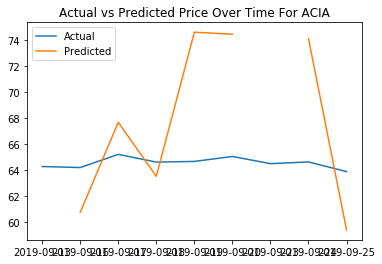

Analytics for ACTG
Predicting Price for ACTG for model on 2019-09-13
Predicting Price for ACTG for model on 2019-09-16
Predicting Price for ACTG for model on 2019-09-17
Predicting Price for ACTG for model on 2019-09-18
Predicting Price for ACTG for model on 2019-09-19
Predicting Price for ACTG for model on 2019-09-20
Predicting Price for ACTG for model on 2019-09-23
Predicting Price for ACTG for model on 2019-09-24
Predicting Price for ACTG for model on 2019-09-25


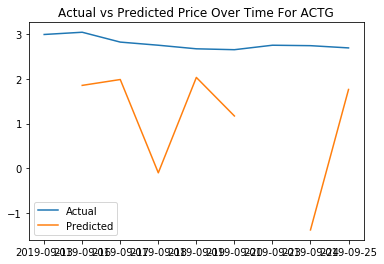

Analytics for ACHC
Predicting Price for ACHC for model on 2019-09-13
Predicting Price for ACHC for model on 2019-09-16
Predicting Price for ACHC for model on 2019-09-17
Predicting Price for ACHC for model on 2019-09-18
Predicting Price for ACHC for model on 2019-09-19
Predicting Price for ACHC for model on 2019-09-20
Predicting Price for ACHC for model on 2019-09-23
Predicting Price for ACHC for model on 2019-09-24
Predicting Price for ACHC for model on 2019-09-25


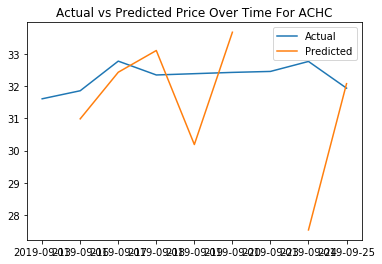

Analytics for ACAD
Predicting Price for ACAD for model on 2019-09-13
Predicting Price for ACAD for model on 2019-09-16
Predicting Price for ACAD for model on 2019-09-17
Predicting Price for ACAD for model on 2019-09-18
Predicting Price for ACAD for model on 2019-09-19
Predicting Price for ACAD for model on 2019-09-20
Predicting Price for ACAD for model on 2019-09-23
Predicting Price for ACAD for model on 2019-09-24
Predicting Price for ACAD for model on 2019-09-25


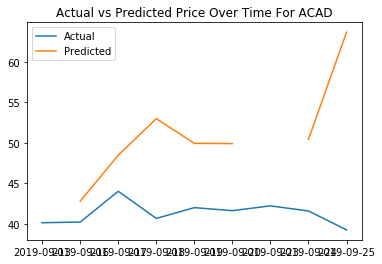

Analytics for ACST
Predicting Price for ACST for model on 2019-09-13
Predicting Price for ACST for model on 2019-09-16
Predicting Price for ACST for model on 2019-09-17
Predicting Price for ACST for model on 2019-09-18
Predicting Price for ACST for model on 2019-09-19
Predicting Price for ACST for model on 2019-09-20
Predicting Price for ACST for model on 2019-09-23
Predicting Price for ACST for model on 2019-09-24
Predicting Price for ACST for model on 2019-09-25


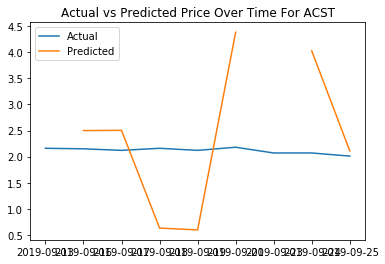

Analytics for AXDX
Predicting Price for AXDX for model on 2019-09-13
Predicting Price for AXDX for model on 2019-09-16
Predicting Price for AXDX for model on 2019-09-17
Predicting Price for AXDX for model on 2019-09-18
Predicting Price for AXDX for model on 2019-09-19
Predicting Price for AXDX for model on 2019-09-20
Predicting Price for AXDX for model on 2019-09-23
Predicting Price for AXDX for model on 2019-09-24
Predicting Price for AXDX for model on 2019-09-25


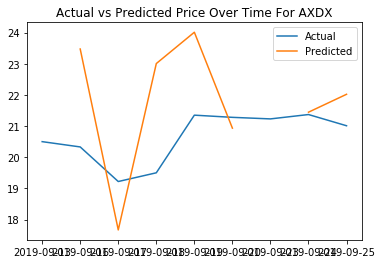

Analytics for XLRN
Predicting Price for XLRN for model on 2019-09-13
Predicting Price for XLRN for model on 2019-09-16
Predicting Price for XLRN for model on 2019-09-17
Predicting Price for XLRN for model on 2019-09-18
Predicting Price for XLRN for model on 2019-09-19
Predicting Price for XLRN for model on 2019-09-20
Predicting Price for XLRN for model on 2019-09-23
Predicting Price for XLRN for model on 2019-09-24
Predicting Price for XLRN for model on 2019-09-25


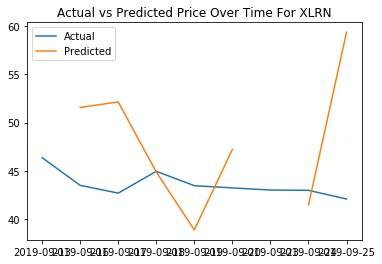

Analytics for ARAY
Predicting Price for ARAY for model on 2019-09-13
Predicting Price for ARAY for model on 2019-09-16
Predicting Price for ARAY for model on 2019-09-17
Predicting Price for ARAY for model on 2019-09-18
Predicting Price for ARAY for model on 2019-09-19
Predicting Price for ARAY for model on 2019-09-20
Predicting Price for ARAY for model on 2019-09-23
Predicting Price for ARAY for model on 2019-09-24
Predicting Price for ARAY for model on 2019-09-25


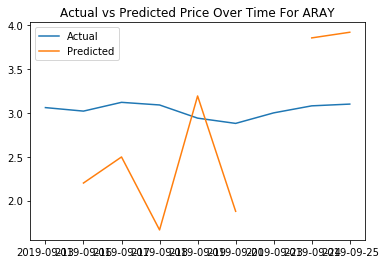

Analytics for ACRX
Predicting Price for ACRX for model on 2019-09-13
Predicting Price for ACRX for model on 2019-09-16
Predicting Price for ACRX for model on 2019-09-17
Predicting Price for ACRX for model on 2019-09-18
Predicting Price for ACRX for model on 2019-09-19
Predicting Price for ACRX for model on 2019-09-20
Predicting Price for ACRX for model on 2019-09-23
Predicting Price for ACRX for model on 2019-09-24
Predicting Price for ACRX for model on 2019-09-25


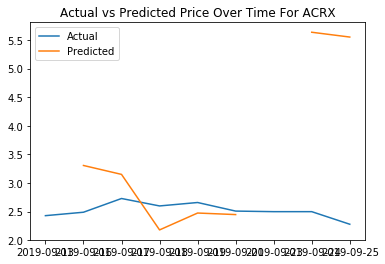

Analytics for ACER
Predicting Price for ACER for model on 2019-09-13
Predicting Price for ACER for model on 2019-09-16
Predicting Price for ACER for model on 2019-09-17
Predicting Price for ACER for model on 2019-09-18
Predicting Price for ACER for model on 2019-09-19
Predicting Price for ACER for model on 2019-09-20
Predicting Price for ACER for model on 2019-09-23
Predicting Price for ACER for model on 2019-09-24
Predicting Price for ACER for model on 2019-09-25


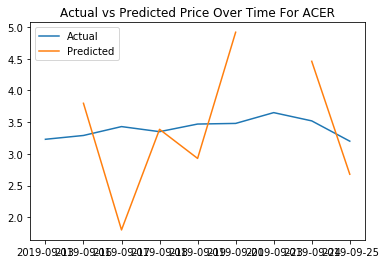

Analytics for ACET
IndexError for ACET
Analytics for AKAO
IndexError for AKAO
Analytics for ACHV
RemoteDataError for ACHV
Analytics for ACHN
Predicting Price for ACHN for model on 2019-09-13
Predicting Price for ACHN for model on 2019-09-16
Predicting Price for ACHN for model on 2019-09-17
Predicting Price for ACHN for model on 2019-09-18
Predicting Price for ACHN for model on 2019-09-19
Predicting Price for ACHN for model on 2019-09-20
Predicting Price for ACHN for model on 2019-09-23
Predicting Price for ACHN for model on 2019-09-24
Predicting Price for ACHN for model on 2019-09-25


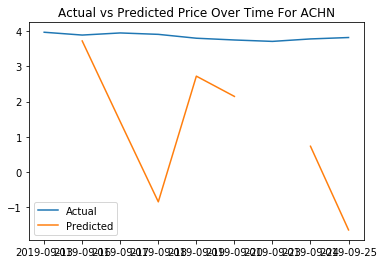

Analytics for ACIW
Predicting Price for ACIW for model on 2019-09-13
Predicting Price for ACIW for model on 2019-09-16
Predicting Price for ACIW for model on 2019-09-17
Predicting Price for ACIW for model on 2019-09-18
Predicting Price for ACIW for model on 2019-09-19
Predicting Price for ACIW for model on 2019-09-20
Predicting Price for ACIW for model on 2019-09-23
Predicting Price for ACIW for model on 2019-09-24
Predicting Price for ACIW for model on 2019-09-25


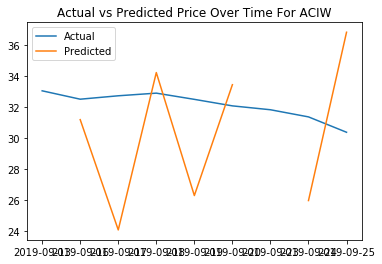

Analytics for ACRS
Predicting Price for ACRS for model on 2019-09-13
Predicting Price for ACRS for model on 2019-09-16
Predicting Price for ACRS for model on 2019-09-17
Predicting Price for ACRS for model on 2019-09-18
Predicting Price for ACRS for model on 2019-09-19
Predicting Price for ACRS for model on 2019-09-20
Predicting Price for ACRS for model on 2019-09-23
Predicting Price for ACRS for model on 2019-09-24
Predicting Price for ACRS for model on 2019-09-25


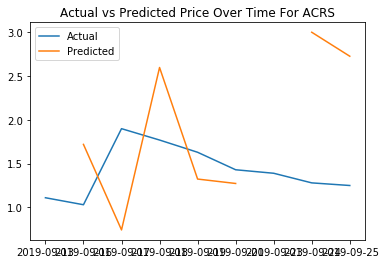

Analytics for ACMR
Predicting Price for ACMR for model on 2019-09-13
Predicting Price for ACMR for model on 2019-09-16
Predicting Price for ACMR for model on 2019-09-17
Predicting Price for ACMR for model on 2019-09-18
Predicting Price for ACMR for model on 2019-09-19
Predicting Price for ACMR for model on 2019-09-20
Predicting Price for ACMR for model on 2019-09-23
Predicting Price for ACMR for model on 2019-09-24
Predicting Price for ACMR for model on 2019-09-25


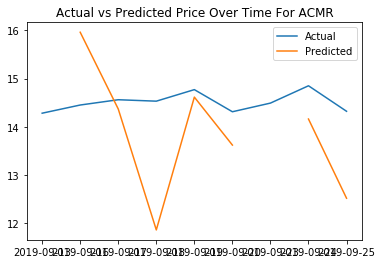

Analytics for ACOR
Predicting Price for ACOR for model on 2019-09-13
Predicting Price for ACOR for model on 2019-09-16
Predicting Price for ACOR for model on 2019-09-17
Predicting Price for ACOR for model on 2019-09-18
Predicting Price for ACOR for model on 2019-09-19
Predicting Price for ACOR for model on 2019-09-20
Predicting Price for ACOR for model on 2019-09-23
Predicting Price for ACOR for model on 2019-09-24
Predicting Price for ACOR for model on 2019-09-25


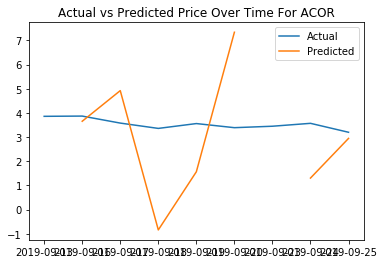

Analytics for ATVI
Predicting Price for ATVI for model on 2019-09-13
Predicting Price for ATVI for model on 2019-09-16
Predicting Price for ATVI for model on 2019-09-17
Predicting Price for ATVI for model on 2019-09-18
Predicting Price for ATVI for model on 2019-09-19
Predicting Price for ATVI for model on 2019-09-20
Predicting Price for ATVI for model on 2019-09-23
Predicting Price for ATVI for model on 2019-09-24
Predicting Price for ATVI for model on 2019-09-25


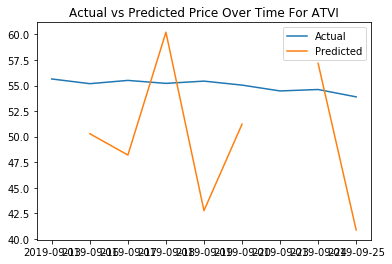

Analytics for ADMS
Predicting Price for ADMS for model on 2019-09-13
Predicting Price for ADMS for model on 2019-09-16
Predicting Price for ADMS for model on 2019-09-17
Predicting Price for ADMS for model on 2019-09-18
Predicting Price for ADMS for model on 2019-09-19
Predicting Price for ADMS for model on 2019-09-20
Predicting Price for ADMS for model on 2019-09-23
Predicting Price for ADMS for model on 2019-09-24
Predicting Price for ADMS for model on 2019-09-25


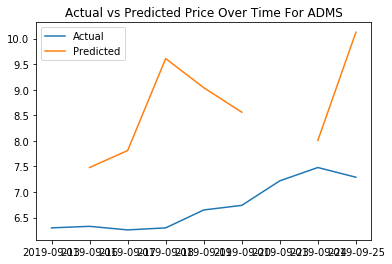

Analytics for ADMP
Predicting Price for ADMP for model on 2019-09-13
Predicting Price for ADMP for model on 2019-09-16
Predicting Price for ADMP for model on 2019-09-17
Predicting Price for ADMP for model on 2019-09-18
Predicting Price for ADMP for model on 2019-09-19
Predicting Price for ADMP for model on 2019-09-20
Predicting Price for ADMP for model on 2019-09-23
Predicting Price for ADMP for model on 2019-09-24
Predicting Price for ADMP for model on 2019-09-25


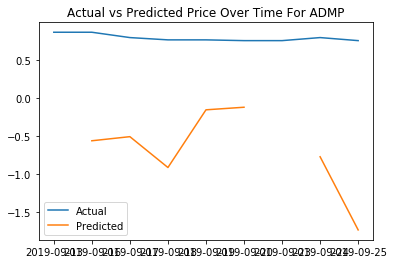

Analytics for ADAP
Predicting Price for ADAP for model on 2019-09-13
Predicting Price for ADAP for model on 2019-09-16
Predicting Price for ADAP for model on 2019-09-17
Predicting Price for ADAP for model on 2019-09-18
Predicting Price for ADAP for model on 2019-09-19
Predicting Price for ADAP for model on 2019-09-20
Predicting Price for ADAP for model on 2019-09-23
Predicting Price for ADAP for model on 2019-09-24
Predicting Price for ADAP for model on 2019-09-25


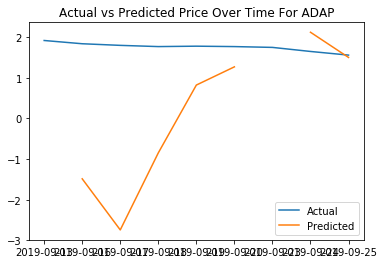

Analytics for ADUS
Predicting Price for ADUS for model on 2019-09-13
Predicting Price for ADUS for model on 2019-09-16
Predicting Price for ADUS for model on 2019-09-17
Predicting Price for ADUS for model on 2019-09-18
Predicting Price for ADUS for model on 2019-09-19
Predicting Price for ADUS for model on 2019-09-20
Predicting Price for ADUS for model on 2019-09-23
Predicting Price for ADUS for model on 2019-09-24
Predicting Price for ADUS for model on 2019-09-25


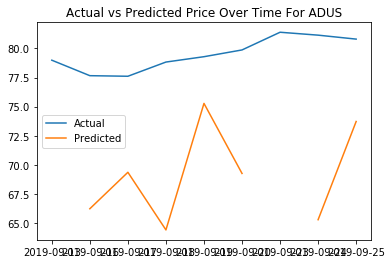

Analytics for AEY
Predicting Price for AEY for model on 2019-09-13
Predicting Price for AEY for model on 2019-09-16
Predicting Price for AEY for model on 2019-09-17
Predicting Price for AEY for model on 2019-09-18
Predicting Price for AEY for model on 2019-09-19
Predicting Price for AEY for model on 2019-09-20
Predicting Price for AEY for model on 2019-09-23
Predicting Price for AEY for model on 2019-09-24
Predicting Price for AEY for model on 2019-09-25


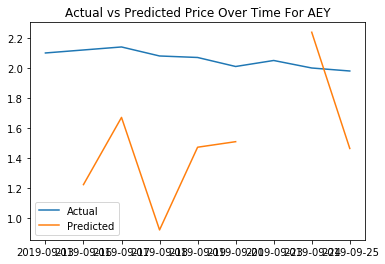

Analytics for IOTS
Predicting Price for IOTS for model on 2019-09-13
Predicting Price for IOTS for model on 2019-09-16
Predicting Price for IOTS for model on 2019-09-17
Predicting Price for IOTS for model on 2019-09-18
Predicting Price for IOTS for model on 2019-09-19
Predicting Price for IOTS for model on 2019-09-20
Predicting Price for IOTS for model on 2019-09-23
Predicting Price for IOTS for model on 2019-09-24
Predicting Price for IOTS for model on 2019-09-25


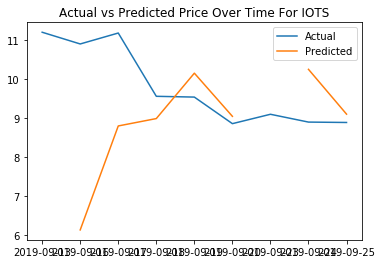

Analytics for ADIL
Predicting Price for ADIL for model on 2019-09-13
Predicting Price for ADIL for model on 2019-09-16
Predicting Price for ADIL for model on 2019-09-17
Predicting Price for ADIL for model on 2019-09-18
Predicting Price for ADIL for model on 2019-09-19
Predicting Price for ADIL for model on 2019-09-20
Predicting Price for ADIL for model on 2019-09-23
Predicting Price for ADIL for model on 2019-09-24
Predicting Price for ADIL for model on 2019-09-25


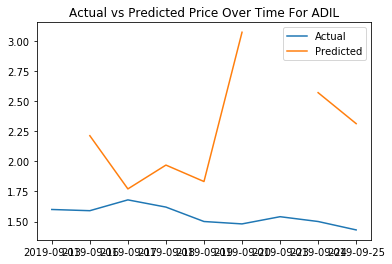

Analytics for ADMA
Predicting Price for ADMA for model on 2019-09-13
Predicting Price for ADMA for model on 2019-09-16
Predicting Price for ADMA for model on 2019-09-17
Predicting Price for ADMA for model on 2019-09-18
Predicting Price for ADMA for model on 2019-09-19
Predicting Price for ADMA for model on 2019-09-20
Predicting Price for ADMA for model on 2019-09-23
Predicting Price for ADMA for model on 2019-09-24
Predicting Price for ADMA for model on 2019-09-25


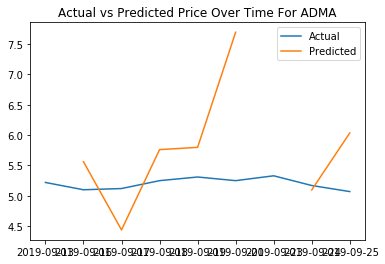

Analytics for ADBE
Predicting Price for ADBE for model on 2019-09-13
Predicting Price for ADBE for model on 2019-09-16
Predicting Price for ADBE for model on 2019-09-17
Predicting Price for ADBE for model on 2019-09-18
Predicting Price for ADBE for model on 2019-09-19
Predicting Price for ADBE for model on 2019-09-20
Predicting Price for ADBE for model on 2019-09-23
Predicting Price for ADBE for model on 2019-09-24
Predicting Price for ADBE for model on 2019-09-25


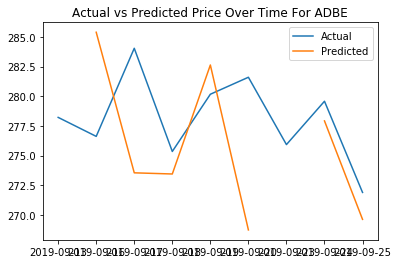

Analytics for ADOM
Predicting Price for ADOM for model on 2019-09-13
Predicting Price for ADOM for model on 2019-09-16
Predicting Price for ADOM for model on 2019-09-17
Predicting Price for ADOM for model on 2019-09-18
Predicting Price for ADOM for model on 2019-09-19
Predicting Price for ADOM for model on 2019-09-20
Predicting Price for ADOM for model on 2019-09-23
Predicting Price for ADOM for model on 2019-09-24
Predicting Price for ADOM for model on 2019-09-25


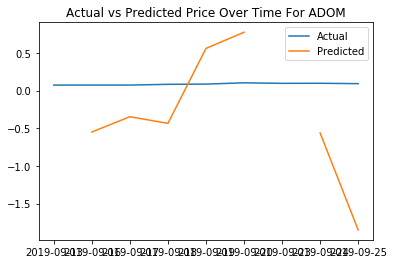

Analytics for ADTN
Predicting Price for ADTN for model on 2019-09-13
Predicting Price for ADTN for model on 2019-09-16
Predicting Price for ADTN for model on 2019-09-17
Predicting Price for ADTN for model on 2019-09-18
Predicting Price for ADTN for model on 2019-09-19
Predicting Price for ADTN for model on 2019-09-20
Predicting Price for ADTN for model on 2019-09-23
Predicting Price for ADTN for model on 2019-09-24
Predicting Price for ADTN for model on 2019-09-25


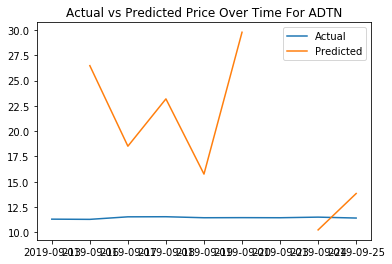

Analytics for ADRO
Predicting Price for ADRO for model on 2019-09-13
Predicting Price for ADRO for model on 2019-09-16
Predicting Price for ADRO for model on 2019-09-17
Predicting Price for ADRO for model on 2019-09-18
Predicting Price for ADRO for model on 2019-09-19
Predicting Price for ADRO for model on 2019-09-20
Predicting Price for ADRO for model on 2019-09-23
Predicting Price for ADRO for model on 2019-09-24
Predicting Price for ADRO for model on 2019-09-25


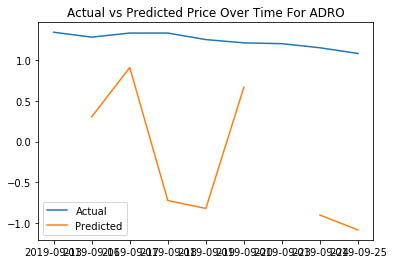

Analytics for ADES
RemoteDataError for ADES
Analytics for AEIS
Predicting Price for AEIS for model on 2019-09-13
Predicting Price for AEIS for model on 2019-09-16
Predicting Price for AEIS for model on 2019-09-17
Predicting Price for AEIS for model on 2019-09-18
Predicting Price for AEIS for model on 2019-09-19
Predicting Price for AEIS for model on 2019-09-20
Predicting Price for AEIS for model on 2019-09-23
Predicting Price for AEIS for model on 2019-09-24
Predicting Price for AEIS for model on 2019-09-25


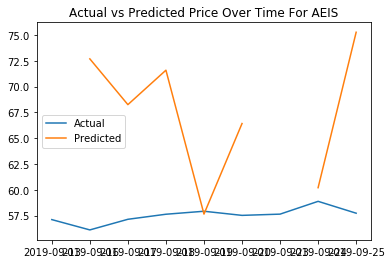

Analytics for AMD
RemoteDataError for AMD
Analytics for ADXS
Predicting Price for ADXS for model on 2019-09-13
Predicting Price for ADXS for model on 2019-09-16
Predicting Price for ADXS for model on 2019-09-17
Predicting Price for ADXS for model on 2019-09-18
Predicting Price for ADXS for model on 2019-09-19
Predicting Price for ADXS for model on 2019-09-20
Predicting Price for ADXS for model on 2019-09-23
Predicting Price for ADXS for model on 2019-09-24
Predicting Price for ADXS for model on 2019-09-25


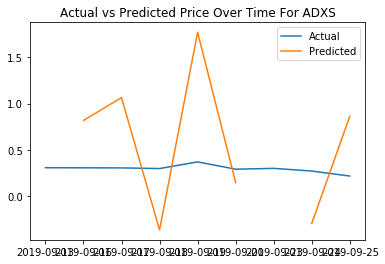

Analytics for ADVM
Predicting Price for ADVM for model on 2019-09-13
Predicting Price for ADVM for model on 2019-09-16
Predicting Price for ADVM for model on 2019-09-17
Predicting Price for ADVM for model on 2019-09-18
Predicting Price for ADVM for model on 2019-09-19
Predicting Price for ADVM for model on 2019-09-20
Predicting Price for ADVM for model on 2019-09-23
Predicting Price for ADVM for model on 2019-09-24
Predicting Price for ADVM for model on 2019-09-25


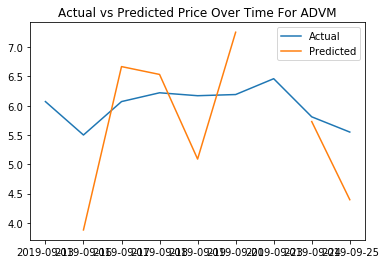

Analytics for AEGN
Predicting Price for AEGN for model on 2019-09-13
Predicting Price for AEGN for model on 2019-09-16
Predicting Price for AEGN for model on 2019-09-17
Predicting Price for AEGN for model on 2019-09-18
Predicting Price for AEGN for model on 2019-09-19
Predicting Price for AEGN for model on 2019-09-20
Predicting Price for AEGN for model on 2019-09-23
Predicting Price for AEGN for model on 2019-09-24
Predicting Price for AEGN for model on 2019-09-25


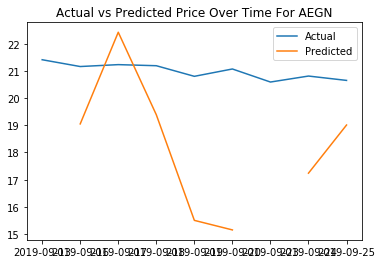

Analytics for AGLE
Predicting Price for AGLE for model on 2019-09-13
Predicting Price for AGLE for model on 2019-09-16
Predicting Price for AGLE for model on 2019-09-17
Predicting Price for AGLE for model on 2019-09-18
Predicting Price for AGLE for model on 2019-09-19
Predicting Price for AGLE for model on 2019-09-20
Predicting Price for AGLE for model on 2019-09-23
Predicting Price for AGLE for model on 2019-09-24
Predicting Price for AGLE for model on 2019-09-25


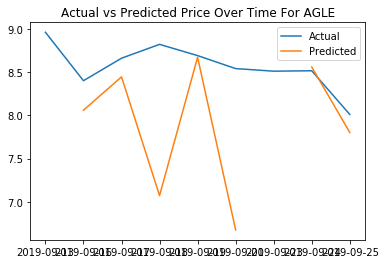

Analytics for AEHR
Predicting Price for AEHR for model on 2019-09-13
Predicting Price for AEHR for model on 2019-09-16
Predicting Price for AEHR for model on 2019-09-17
Predicting Price for AEHR for model on 2019-09-18
Predicting Price for AEHR for model on 2019-09-19
Predicting Price for AEHR for model on 2019-09-20
Predicting Price for AEHR for model on 2019-09-23
Predicting Price for AEHR for model on 2019-09-24
Predicting Price for AEHR for model on 2019-09-25


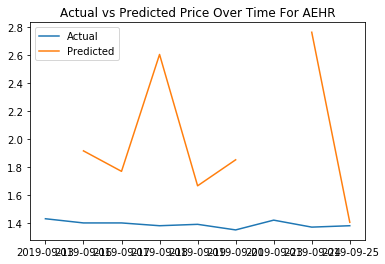

Analytics for AMTX
Predicting Price for AMTX for model on 2019-09-13
Predicting Price for AMTX for model on 2019-09-16
Predicting Price for AMTX for model on 2019-09-17
Predicting Price for AMTX for model on 2019-09-18
Predicting Price for AMTX for model on 2019-09-19
Predicting Price for AMTX for model on 2019-09-20
Predicting Price for AMTX for model on 2019-09-23
Predicting Price for AMTX for model on 2019-09-24
Predicting Price for AMTX for model on 2019-09-25


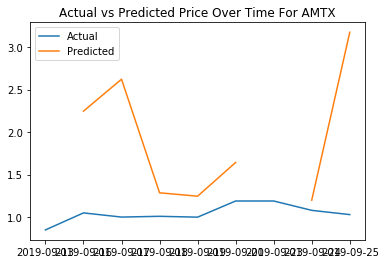

Analytics for AERI
RemoteDataError for AERI
Analytics for AVAV
Predicting Price for AVAV for model on 2019-09-13
Predicting Price for AVAV for model on 2019-09-16
Predicting Price for AVAV for model on 2019-09-17
Predicting Price for AVAV for model on 2019-09-18
Predicting Price for AVAV for model on 2019-09-19
Predicting Price for AVAV for model on 2019-09-20
Predicting Price for AVAV for model on 2019-09-23
Predicting Price for AVAV for model on 2019-09-24
Predicting Price for AVAV for model on 2019-09-25


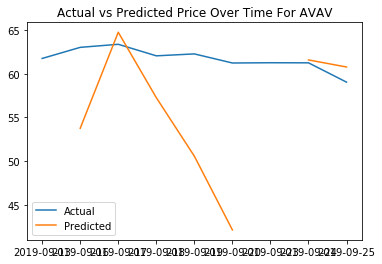

Analytics for ARPO
Predicting Price for ARPO for model on 2019-09-13
Predicting Price for ARPO for model on 2019-09-16
Predicting Price for ARPO for model on 2019-09-17
Predicting Price for ARPO for model on 2019-09-18
Predicting Price for ARPO for model on 2019-09-19
Predicting Price for ARPO for model on 2019-09-20
Predicting Price for ARPO for model on 2019-09-23
Predicting Price for ARPO for model on 2019-09-24
Predicting Price for ARPO for model on 2019-09-25


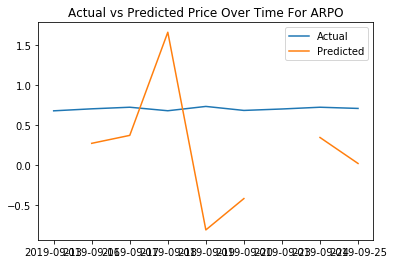

Analytics for AEZS
RemoteDataError for AEZS
Analytics for AEMD
RemoteDataError for AEMD
Analytics for GNMX
Predicting Price for GNMX for model on 2019-09-13
Predicting Price for GNMX for model on 2019-09-16
Predicting Price for GNMX for model on 2019-09-17
Predicting Price for GNMX for model on 2019-09-18
Predicting Price for GNMX for model on 2019-09-19
Predicting Price for GNMX for model on 2019-09-20
Predicting Price for GNMX for model on 2019-09-23
Predicting Price for GNMX for model on 2019-09-24
Predicting Price for GNMX for model on 2019-09-25


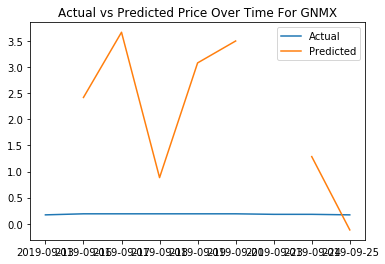

Analytics for AFMD
RemoteDataError for AFMD
Analytics for AGEN
Predicting Price for AGEN for model on 2019-09-13
Predicting Price for AGEN for model on 2019-09-16
Predicting Price for AGEN for model on 2019-09-17
Predicting Price for AGEN for model on 2019-09-18
Predicting Price for AGEN for model on 2019-09-19
Predicting Price for AGEN for model on 2019-09-20
Predicting Price for AGEN for model on 2019-09-23
Predicting Price for AGEN for model on 2019-09-24
Predicting Price for AGEN for model on 2019-09-25


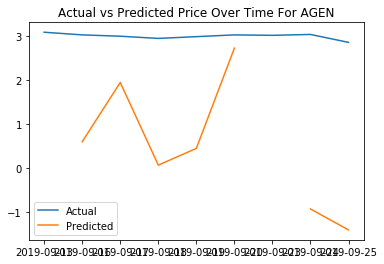

Analytics for AGRX
Predicting Price for AGRX for model on 2019-09-13
Predicting Price for AGRX for model on 2019-09-16
Predicting Price for AGRX for model on 2019-09-17
Predicting Price for AGRX for model on 2019-09-18
Predicting Price for AGRX for model on 2019-09-19
Predicting Price for AGRX for model on 2019-09-20
Predicting Price for AGRX for model on 2019-09-23
Predicting Price for AGRX for model on 2019-09-24
Predicting Price for AGRX for model on 2019-09-25


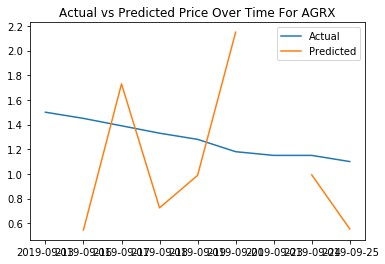

Analytics for AGYS
RemoteDataError for AGYS
Analytics for AGIO
Predicting Price for AGIO for model on 2019-09-13
Predicting Price for AGIO for model on 2019-09-16
Predicting Price for AGIO for model on 2019-09-17
Predicting Price for AGIO for model on 2019-09-18
Predicting Price for AGIO for model on 2019-09-19
Predicting Price for AGIO for model on 2019-09-20
Predicting Price for AGIO for model on 2019-09-23
Predicting Price for AGIO for model on 2019-09-24
Predicting Price for AGIO for model on 2019-09-25


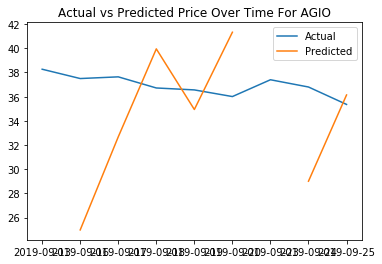

Analytics for AGNC
Predicting Price for AGNC for model on 2019-09-13
Predicting Price for AGNC for model on 2019-09-16
Predicting Price for AGNC for model on 2019-09-17
Predicting Price for AGNC for model on 2019-09-18
Predicting Price for AGNC for model on 2019-09-19
Predicting Price for AGNC for model on 2019-09-20
Predicting Price for AGNC for model on 2019-09-23
Predicting Price for AGNC for model on 2019-09-24
Predicting Price for AGNC for model on 2019-09-25


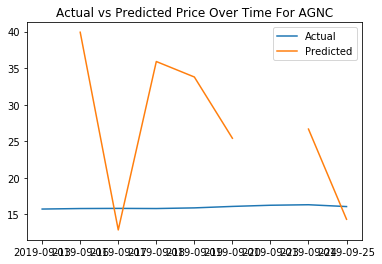

Analytics for AGFS
Predicting Price for AGFS for model on 2019-09-13
Predicting Price for AGFS for model on 2019-09-16
Predicting Price for AGFS for model on 2019-09-17
Predicting Price for AGFS for model on 2019-09-18
Predicting Price for AGFS for model on 2019-09-19
Predicting Price for AGFS for model on 2019-09-20
Predicting Price for AGFS for model on 2019-09-23
Predicting Price for AGFS for model on 2019-09-24
Predicting Price for AGFS for model on 2019-09-25


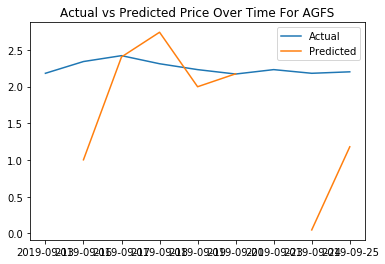

Analytics for ALRN
Predicting Price for ALRN for model on 2019-09-13
Predicting Price for ALRN for model on 2019-09-16
Predicting Price for ALRN for model on 2019-09-17
Predicting Price for ALRN for model on 2019-09-18
Predicting Price for ALRN for model on 2019-09-19
Predicting Price for ALRN for model on 2019-09-20
Predicting Price for ALRN for model on 2019-09-23
Predicting Price for ALRN for model on 2019-09-24
Predicting Price for ALRN for model on 2019-09-25


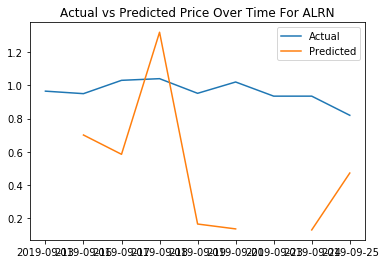

Analytics for AIMT
Predicting Price for AIMT for model on 2019-09-13
Predicting Price for AIMT for model on 2019-09-16
Predicting Price for AIMT for model on 2019-09-17
Predicting Price for AIMT for model on 2019-09-18
Predicting Price for AIMT for model on 2019-09-19
Predicting Price for AIMT for model on 2019-09-20
Predicting Price for AIMT for model on 2019-09-23
Predicting Price for AIMT for model on 2019-09-24
Predicting Price for AIMT for model on 2019-09-25


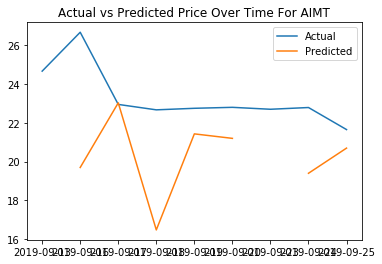

Analytics for ATSG
RemoteDataError for ATSG
Analytics for AIRG
Predicting Price for AIRG for model on 2019-09-13
Predicting Price for AIRG for model on 2019-09-16
Predicting Price for AIRG for model on 2019-09-17
Predicting Price for AIRG for model on 2019-09-18
Predicting Price for AIRG for model on 2019-09-19
Predicting Price for AIRG for model on 2019-09-20
Predicting Price for AIRG for model on 2019-09-23
Predicting Price for AIRG for model on 2019-09-24
Predicting Price for AIRG for model on 2019-09-25


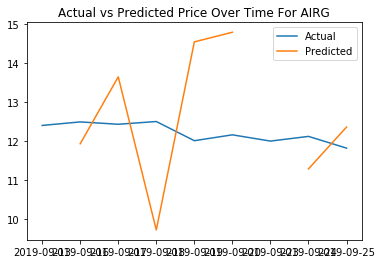

Analytics for AMCN
IndexError for AMCN
Analytics for AKAM
Predicting Price for AKAM for model on 2019-09-13
Predicting Price for AKAM for model on 2019-09-16
Predicting Price for AKAM for model on 2019-09-17
Predicting Price for AKAM for model on 2019-09-18
Predicting Price for AKAM for model on 2019-09-19
Predicting Price for AKAM for model on 2019-09-20
Predicting Price for AKAM for model on 2019-09-23
Predicting Price for AKAM for model on 2019-09-24
Predicting Price for AKAM for model on 2019-09-25


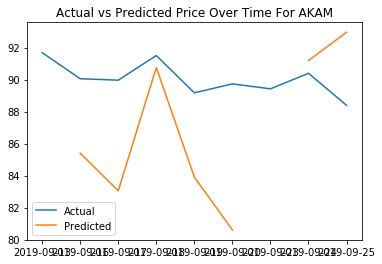

Analytics for AKTX
Predicting Price for AKTX for model on 2019-09-13
Predicting Price for AKTX for model on 2019-09-16
Predicting Price for AKTX for model on 2019-09-17
Predicting Price for AKTX for model on 2019-09-18
Predicting Price for AKTX for model on 2019-09-19


KeyError: 'Market Cap (intraday)'

In [21]:
prediction_analytics(tickers, end_date='2019-09-25', numdays=9)

In [12]:
get_price_data('SRCE', '2019-09-16', '2019-09-20')['Open']

Date
2019-09-16    47.360001
2019-09-17    47.840000
2019-09-18    47.540001
2019-09-19    47.580002
2019-09-20    47.180000
Name: Open, dtype: float64